In [466]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import statistics
import math
from sklearn import preprocessing
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import reverse_geocoder as rg
import unicodedata
from datetime import datetime
from geopy import distance

In [682]:
with open('data/data_venues_concerts_artists.csv', encoding='utf-8') as file:
    concerts_artists_df = pd.read_csv(file, index_col=0)
    
with open('data/full_data.csv', encoding='utf-8') as file:
    full_data_df = pd.read_csv(file, index_col=0)
    
with open('data/songkick/data_songkick_concerts_light.csv', encoding='utf-8') as file:
    concerts_df = pd.read_csv(file, index_col=0)
    #concerts_df.index.name = 'concert_id'
    
with open('data/songkick/data_songkick_venues_no_duplicate.csv', encoding='utf-8') as file:
    venues_df = pd.read_csv(file, index_col=0)
    venues_df.index.name = 'venue_id'
    
with open('data/songkick/data_songkick_artists.csv', encoding='utf-8') as file:
    songkick_artists_df = pd.read_csv(file, index_col=0)
    
with open('data/spotify/data_spotify_artists_light.csv', encoding='utf-8') as file:
    artists_df = pd.read_csv(file, index_col=0)
    artists_df.index.name = 'artist_id'

with open('data/spotify/data_spotify_top_genres_final.csv', encoding='utf-8') as file:
    spotify_genres_df = pd.read_csv(file, index_col=0)
    
with open('data/wikidata/data_wikidata_top_genres.csv', encoding='utf-8') as file:
    wikidata_genres_df = pd.read_csv(file, index_col=0)
    
with open('data/wikidata/data_wikidata_unique_top_genres_manual.csv', encoding='utf-8') as file:
    wikidata_unique_genres_df = pd.read_csv(file, index_col=0)
    
with open('data/wikidata/data_wikidata_top_genres_list_manual.csv', encoding='utf-8') as file:
    wikidata_manual_top_genres_df = pd.read_csv(file, index_col=0)

print('loaded')

loaded


## Coordinates
---

In [87]:
coordinates = (46.61671, 6.64496)
rg.search(coordinates)

[{'lat': '46.61596',
  'lon': '6.66149',
  'name': 'Bottens',
  'admin1': 'Vaud',
  'admin2': 'Gros-de-Vaud District',
  'cc': 'CH'}]

In [29]:
with open('data/CH.csv', encoding='utf-8') as file:
    localities_df = pd.read_csv(file, error_bad_lines=False, sep=';')

localities_df

,EGID,GDEKT,GDENR,GDENAME,GSTAT,GSTATLAB_DE,GSTATLAB_FR,GSTATLAB_IT,GKODE,GKODN,...,STRNAME,DEINR,STRSP,DPLZ4,DPLZZ,DPLZNAME,DKODE,DKODN,DOFFADR,DEXPDAT
0,1,ZH,2.0,Affoltern am Albis,1004.0,bestehend,existant,esistente,2676465.140,1235849.103,...,Grossholzerstrasse,20,DE,8910,0,Affoltern am Albis,2676465.141,1235849.103,0,2021-11-12 00:00:00
1,10,ZH,2.0,Affoltern am Albis,1004.0,bestehend,existant,esistente,2676440.038,1235973.538,...,Im Feld,9,DE,8910,0,Affoltern am Albis,2676444.333,1235975.496,0,2021-11-12 00:00:00
2,100,ZH,2.0,Affoltern am Albis,1004.0,bestehend,existant,esistente,2676765.706,1236101.658,...,Hasenbühlstrasse,17,DE,8910,0,Affoltern am Albis,2676768.763,1236102.071,0,2021-11-12 00:00:00
3,10000,ZH,30.0,Andelfingen,1004.0,bestehend,existant,esistente,2693391.650,1272255.267,...,Obermühlestrasse,7,DE,8450,0,Andelfingen,2693387.845,1272250.319,0,2021-11-12 00:00:00
4,1000001,GE,6602.0,Anières,1004.0,bestehend,existant,esistente,2506071.380,1125077.000,...,Chemin des Avallons,2,FR,1247,0,Anières,2506079.092,1125072.483,0,2021-11-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779162,99994,ZH,198.0,Uster,1004.0,bestehend,existant,esistente,2696705.683,1245022.556,...,Bahnhofstrasse,12,DE,8610,0,Uster,2696701.236,1245026.105,0,2021-11-12 00:00:00
2779163,99995,ZH,198.0,Uster,1004.0,bestehend,existant,esistente,2696792.976,1245085.637,...,Bahnhofstrasse,3,DE,8610,0,Uster,2696789.652,1245081.951,0,2021-11-12 00:00:00
2779164,99996,ZH,198.0,Uster,1004.0,bestehend,existant,esistente,2696718.474,1245039.536,...,Bahnhofstrasse,10,DE,8610,0,Uster,2696715.489,1245043.901,0,2021-11-12 00:00:00
2779165,99997,ZH,198.0,Uster,1004.0,bestehend,existant,esistente,2696722.040,1245043.472,...,Bahnhofstrasse,8,DE,8610,0,Uster,2696716.688,1245045.502,0,2021-11-12 00:00:00


In [57]:
with open('data/data_ofsp_communes.csv', encoding='utf-8') as file:
    communes_df = pd.read_csv(file)
    
communes_df

,Number of commune,Name of commune,Residents,Change in %,Population density per km²,Foreign nationals in %,0-19 years,20-64 years,65 years or over,Crude marriage rate,...,FDP/PLR 2),CVP,SP,SVP,EVP/CSP,GLP,BDP,PdA/Sol.,GPS,Small right-wing parties
0,NaN,Switzerland,8'606'033,9.4,215,25.3,20.0,61.4,18.7,4.5,...,15.1,11.4,16.8,25.6,2.3,7.8,2.4,1.0,13.2,2.1
1,1.0,Aeugst am Albis,1'981,8.6,250,14.2,19.8,62.2,18.0,7.1,...,16.4,2.5,11.6,30.4,3.2,14.3,1.3,0.2,15.1,3.8
2,2.0,Affoltern am Albis,12'303,10.9,1'162,28.7,20.2,61.7,18.2,5.5,...,13.4,4.5,14.6,30.3,6.6,12.7,2.0,0.2,12.6,1.6
3,3.0,Bonstetten,5'572,8.0,750,16.6,23.6,59.8,16.5,4.3,...,15.4,3.9,16.7,26.1,4.2,16.2,1.3,0.2,12.4,1.4
4,4.0,Hausen am Albis,3'751,11.6,276,16.0,22.2,59.8,18.0,3.2,...,11.1,3.9,13.7,33.2,4.1,12.4,1.6,0.2,16.7,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,6806.0,Vendlincourt,559,1.8,61,7.2,18.4,56.9,24.7,7.3,...,19.1,22.8,17.9,21.2,9.8,*,*,*,9.3,*
2169,6807.0,Basse-Allaine,1'238,-5.3,54,9.1,21.7,53.0,25.3,4.1,...,13.8,40.1,23.6,11.7,3.8,*,*,*,7.0,*
2170,6808.0,Clos du Doubs,1'263,0.2,20,7.3,18.3,56.6,25.1,3.1,...,4.5,33.3,21.6,14.3,10.2,*,*,*,16.1,*
2171,6809.0,Haute-Ajoie,1'085,-6.1,27,8.4,17.8,55.5,26.7,5.5,...,8.4,37.9,19.4,18.7,4.2,*,*,*,11.5,*


In [59]:
# remove accents and uppercase letters
localities_df['locality_formatted'] = localities_df['DPLZNAME'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
communes_df['commune_formatted'] = communes_df['Name of commune'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
communes_df

,Number of commune,Name of commune,Residents,Change in %,Population density per km²,Foreign nationals in %,0-19 years,20-64 years,65 years or over,Crude marriage rate,...,CVP,SP,SVP,EVP/CSP,GLP,BDP,PdA/Sol.,GPS,Small right-wing parties,commune_formatted
0,NaN,Switzerland,8'606'033,9.4,215,25.3,20.0,61.4,18.7,4.5,...,11.4,16.8,25.6,2.3,7.8,2.4,1.0,13.2,2.1,switzerland
1,1.0,Aeugst am Albis,1'981,8.6,250,14.2,19.8,62.2,18.0,7.1,...,2.5,11.6,30.4,3.2,14.3,1.3,0.2,15.1,3.8,aeugst am albis
2,2.0,Affoltern am Albis,12'303,10.9,1'162,28.7,20.2,61.7,18.2,5.5,...,4.5,14.6,30.3,6.6,12.7,2.0,0.2,12.6,1.6,affoltern am albis
3,3.0,Bonstetten,5'572,8.0,750,16.6,23.6,59.8,16.5,4.3,...,3.9,16.7,26.1,4.2,16.2,1.3,0.2,12.4,1.4,bonstetten
4,4.0,Hausen am Albis,3'751,11.6,276,16.0,22.2,59.8,18.0,3.2,...,3.9,13.7,33.2,4.1,12.4,1.6,0.2,16.7,1.6,hausen am albis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,6806.0,Vendlincourt,559,1.8,61,7.2,18.4,56.9,24.7,7.3,...,22.8,17.9,21.2,9.8,*,*,*,9.3,*,vendlincourt
2169,6807.0,Basse-Allaine,1'238,-5.3,54,9.1,21.7,53.0,25.3,4.1,...,40.1,23.6,11.7,3.8,*,*,*,7.0,*,basse-allaine
2170,6808.0,Clos du Doubs,1'263,0.2,20,7.3,18.3,56.6,25.1,3.1,...,33.3,21.6,14.3,10.2,*,*,*,16.1,*,clos du doubs
2171,6809.0,Haute-Ajoie,1'085,-6.1,27,8.4,17.8,55.5,26.7,5.5,...,37.9,19.4,18.7,4.2,*,*,*,11.5,*,haute-ajoie


In [89]:
# remove accents from string and set to lowercase

def normalize_string(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    
    normalized_string = str(text).lower()

    return normalized_string

In [91]:
# data for localities_df: https://www.bfs.admin.ch/bfs/fr/home/bases-statistiques/repertoire-officiel-communes-suisse/tableau-correspondance-regbl.html
# name of localities_df columns: https://www.ech.ch/fr/dokument/1096043c-de44-4761-9b87-c4486c3454f8
# data for communes_df: https://www.bfs.admin.ch/bfs/fr/home/bases-statistiques/repertoire-officiel-communes-suisse.assetdetail.17884688.html
# data for reverse geolocation: http://download.geonames.org/export/dump/

for idx, row in venues_df.iloc[2350:2400].iterrows():
    songkick_venue = row['venue']
    songkick_locality = row['locality']
    lat = row['latitude']
    lon = row['longitude']
    
    if pd.notna(lat):
        locality = rg.search((lat, lon))
        geo_locality = locality[0]['name']
        geo_canton = locality[0]['admin1']
        geo_locality = normalize_string(geo_locality)
        
        # replace zurich neighborhoods "zuerich (kreis xx)" by "zurich"
        if 'zuerich (kreis' in geo_locality:
            geo_locality = 'zurich'
        
        if len(communes_df.loc[communes_df['commune_formatted'] == geo_locality]) > 0:
            print('commune')
        elif len(localities_df.loc[localities_df['locality_formatted'] == geo_locality]) > 0:
            print('locality')
        else:
            # search
            contain_commune = communes_df.loc[communes_df['commune_formatted'].str.contains(geo_locality, case=False)]
            if len(contain_commune) > 0:
                print(songkick_venue, '--', songkick_locality, '->', geo_locality, geo_canton)
                print(contain_commune['commune_formatted'])
                continue
            
            contain_locality = localities_df.loc[localities_df['locality_formatted'].str.contains(geo_locality, case=False)]
            if len(contain_locality) > 0:
                print(songkick_venue, '--', songkick_locality, '->', geo_locality)
                print(contain_locality['locality_formatted'][0])
            else:
                print(songkick_venue, '--', songkick_locality, '->', geo_locality)
        

commune
commune
commune
commune
commune
Hornareal -- Zürich -> richterswil / dorfkern
commune
locality
commune
commune
commune
commune
commune
commune
commune
commune
commune
Sound Arena -- Wohlen -> wohlen Aargau
203     wohlen bei bern
1251       wohlenschwil
1274        wohlen (ag)
Name: commune_formatted, dtype: object
commune
Kulturkeller Custorhaus -- Eschenbach -> eschenbach Saint Gallen
184         oeschenbach
514     eschenbach (lu)
1089    eschenbach (sg)
Name: commune_formatted, dtype: object
commune
commune
commune
commune
commune
commune
commune
commune
commune
commune
commune


In [50]:
localities_df.loc[localities_df['DPLZNAME'] == 'Biel/Bienne']
#communes_df.loc[communes_df['Name of commune'] == 'Fiesch']

,EGID,GDEKT,GDENR,GDENAME,GSTAT,GSTATLAB_DE,GSTATLAB_FR,GSTATLAB_IT,GKODE,GKODN,...,STRNAME,DEINR,STRSP,DPLZ4,DPLZZ,DPLZNAME,DKODE,DKODN,DOFFADR,DEXPDAT
213898,11513808,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2583214.528,1219969.545,...,Chemin des Bourguignons,32a,FR,2505,0,Biel/Bienne,2583213.309,1219976.167,1,2021-11-12 00:00:00
213899,11513808,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2583214.528,1219969.545,...,Burgunderweg,32a,DE,2505,0,Biel/Bienne,2583213.309,1219976.167,1,2021-11-12 00:00:00
213900,11513811,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2585837.257,1220870.502,...,Rue des Diamants,24,FR,2503,0,Biel/Bienne,2585835.456,1220874.786,1,2021-11-12 00:00:00
213901,11513811,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2585837.257,1220870.502,...,Diamantstrasse,24,DE,2503,0,Biel/Bienne,2585835.456,1220874.786,1,2021-11-12 00:00:00
213902,11513814,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2586887.062,1221943.011,...,Chemin de la Prévôté,3c,FR,2504,0,Biel/Bienne,2586891.418,1221946.543,1,2021-11-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701318,9081692,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2588035.767,1223302.354,...,Solothurnstrasse,132,DE,2504,0,Biel/Bienne,2588031.008,1223298.042,1,2021-11-12 00:00:00
2701319,9081694,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2585425.651,1221143.622,...,Rue Basse,1,FR,2502,0,Biel/Bienne,2585430.146,1221138.978,1,2021-11-12 00:00:00
2701320,9081694,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2585425.651,1221143.622,...,Untergasse,1,DE,2502,0,Biel/Bienne,2585430.146,1221138.978,1,2021-11-12 00:00:00
2701321,9081695,BE,371.0,Biel/Bienne,1004.0,bestehend,existant,esistente,2585694.337,1220347.773,...,Rue Centrale,95a,FR,2503,0,Biel/Bienne,2585703.203,1220341.091,1,2021-11-12 00:00:00


## Songkick stats

In [67]:
full_songkick_df = concerts_artists_df.merge(concerts_df[['venue_id', 'startDate']], left_on='concert_id', right_index=True)
full_songkick_df = full_songkick_df.merge(venues_df[['locality', 'longitude', 'latitude']], left_on='venue_id', right_index=True)
full_songkick_df.loc[full_songkick_df['concert_id'] == '/concerts/36259569']

,concert_id,artist_id,venue_id,startDate,locality,longitude,latitude
32066,/concerts/36259569,/artists/8755459-use-fr,/venues/2837343,2019-03-28,Lausanne,6.63141,46.52012
32067,/concerts/36259569,/artists/482962-frustration,/venues/2837343,2019-03-28,Lausanne,6.63141,46.52012


In [36]:
full_songkick_df.count()

concert_id    117760
artist_id     117760
venue_id      117760
startDate     117760
locality      117760
longitude     109292
latitude      109292
dtype: int64

In [39]:
date_filter = full_songkick_df[(full_songkick_df['startDate'] > '2010-01-01') & (full_songkick_df['startDate'] < '2020-01-01')].index
filtered_songkick_df = full_songkick_df.iloc[date_filter]
filtered_songkick_df

,concert_id,artist_id,venue_id,startDate,locality,longitude,latitude
9,/festivals/3250138,/artists/10069604-flavio-stonex,/venues/1943879,2019-10-12,Mels,9.42400,47.04380
10,/concerts/32335899,/artists/11032-jazz-connection,/venues/1943879,2018-08-11,Mels,9.42400,47.04380
11,/concerts/32335884,/artists/11032-jazz-connection,/venues/1943879,2018-08-10,Mels,9.42400,47.04380
12,/concerts/13429724,/artists/2865626-james-lann,/venues/1943879,2012-08-10,Mels,9.42400,47.04380
4,/festivals/3250141,/artists/10069604-flavio-stonex,/venues/2077709,2020-10-17,Mels,NaN,NaN
...,...,...,...,...,...,...,...
117755,/concerts/14836234,/artists/456971-funeral-for-a-friend,/venues/2148724,2013-04-07,Zürich,8.49986,47.38732
117756,/concerts/14836234,/artists/4578008-tidal-sleep,/venues/2148724,2013-04-07,Zürich,8.49986,47.38732
117757,/concerts/14836234,/artists/424864-silverstein,/venues/2148724,2013-04-07,Zürich,8.49986,47.38732
117758,/concerts/16089124,/artists/6316464-vatsgoed,/venues/2148724,2013-04-05,Zürich,8.49986,47.38732


In [41]:
filtered_songkick_df.count()

concert_id    97619
artist_id     97619
venue_id      97619
startDate     97619
locality      97619
longitude     91099
latitude      91099
dtype: int64

## Wikidata stats

In [65]:
wikidata_genres_df.nunique()

genre_id              4579
genre_name            4574
genre_name_edited     4570
top_genre_id          1403
top_genre_name        1403
unique_top_genre         2
everynoise_id         1385
everynoise_name       1385
discogs_genre_name      14
discogs_style_name     555
dtype: int64

In [55]:
wikidata_manual_top_genres_df.count()

top_genre           50
manual_top_genre    27
dtype: int64

## Artists stats
---

In [62]:
artists_matched_df = artists_df.loc[pd.notna(artists_df['spotify_id'])]
spotify_popularity = artists_matched_df['spotify_popularity']
spotify_followers = artists_matched_df['spotify_followers']
spotify_listeners = artists_matched_df['spotify_listeners']
artists_matched_stats_df = artists_matched_df[['spotify_popularity', 'spotify_followers', 'spotify_listeners']]
artists_matched_stats_df

,spotify_popularity,spotify_followers,spotify_listeners
artist_id,,,
/artists/3684861-chk-chk-chk,46.0,133869.0,341800.0
/artists/694091-kadebostan,10.0,1342.0,2000.0
/artists/7433784-pyramids-jazz,26.0,1132.0,25100.0
/artists/8375378-agcrew,29.0,17632.0,28100.0
/artists/44425-smoove,0.0,1.0,28100.0
...,...,...,...
/artists/9915344-stas-mikhailov,2.0,52.0,226.0
/artists/4301-and-you-will-know-us-by-the-trail-of-dead,39.0,63953.0,96600.0
/artists/1099500-euuroshima,36.0,14555.0,90100.0


In [4]:
# artists stats

nbr_songkick_artists = len(artists_df)
nbr_spotify_artists = len(artists_matched_df)
nbr_songkick_artists_unmatched = nbr_songkick_artists - nbr_spotify_artists

unique_spotify_id = artists_df['spotify_id'].value_counts()
idx_list = list()
"""
for idx in list(unique_spotify_id[unique_spotify_id > 1].index):
    idx_list.extend(list(artists_df.loc[artists_df['spotify_id'] == idx].index))
"""
nbr_duplicate_matches = len(idx_list)

mean_popularity = round(spotify_popularity.mean(), 2)
median_popularity = statistics.median(spotify_popularity)
mean_followers = round(spotify_followers.mean(), 2)
median_followers = statistics.median(spotify_followers)
mean_listeners = round(spotify_listeners.mean(), 2)
median_listeners = statistics.median(spotify_listeners)

artists_stats = {
    'nbr_songkick_artists': nbr_songkick_artists,
    'nbr_spotify_artists': nbr_spotify_artists,
    'nbr_songkick_artists_unmatched': nbr_songkick_artists_unmatched,
    'nbr_duplicate_matches': nbr_duplicate_matches,
    'mean_popularity': mean_popularity,
    'median_popularity': median_popularity,
    'mean_followers': mean_followers,
    'median_followers': median_followers,
    'mean_listeners': mean_listeners,
    'median_listeners': median_listeners,
}
artists_stats

{'nbr_songkick_artists': 32231,
 'nbr_spotify_artists': 28537,
 'nbr_songkick_artists_unmatched': 3694,
 'nbr_duplicate_matches': 0,
 'mean_popularity': 22.91,
 'median_popularity': 19.0,
 'mean_followers': 181024.72,
 'median_followers': 2385.0,
 'mean_listeners': 484408.12,
 'median_listeners': 7000.0}

## Artists distribution
---

In [128]:
standardizer = preprocessing.StandardScaler()
minmax = preprocessing.MinMaxScaler()
normalizer = preprocessing.Normalizer()

t = np.asarray(spotify_popularity).reshape(-1,1)
std_popularity = standardizer.fit_transform(t)

In [129]:
stats_array = artists_matched_stats_df.values
stats_std = standardizer.fit_transform(stats_array.T)
stats_norm = normalizer.fit_transform(stats_array.T)
stats_norm

array([[8.78358831e-03, 1.90947572e-03, 4.96463687e-03, ...,
        6.87411259e-03, 2.86421358e-03, 4.96463687e-03],
       [5.25723450e-04, 5.27023336e-06, 4.44553216e-06, ...,
        5.71596472e-05, 2.62961867e-05, 6.26144565e-05],
       [7.69671717e-04, 4.50363790e-06, 5.65206556e-05, ...,
        2.02888887e-04, 1.14842766e-05, 4.18838325e-05]])

In [54]:
X = np.asarray([1, -1, 2])
print(X)
x1 = np.random.randint(0, 100, 10)
print(x1)
normalizer.transform

[ 1 -1  2]
[ 9 54 34 95 20 76 79 56 19 20]


In [135]:
stats_array.T

array([[4.60000e+01, 1.00000e+01, 2.60000e+01, ..., 3.60000e+01,
        1.50000e+01, 2.60000e+01],
       [1.33869e+05, 1.34200e+03, 1.13200e+03, ..., 1.45550e+04,
        6.69600e+03, 1.59440e+04],
       [3.41800e+05, 2.00000e+03, 2.51000e+04, ..., 9.01000e+04,
        5.10000e+03, 1.86000e+04]])

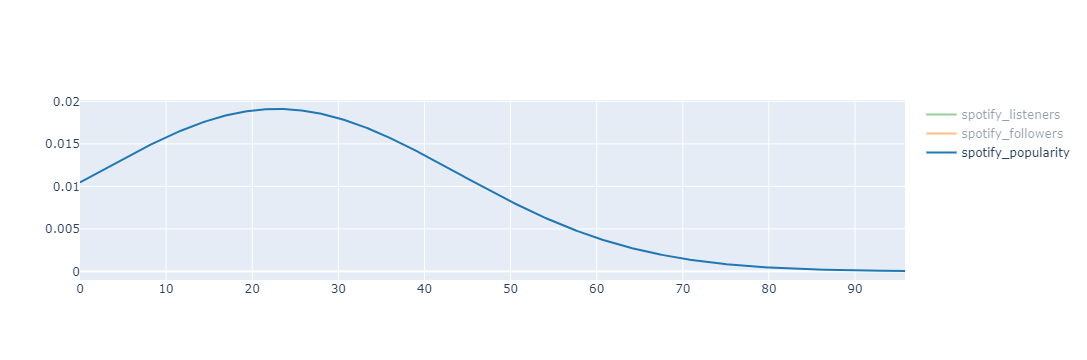

In [136]:
distri_data = [x for x in stats_array.T]
distri_label = [label for label in artists_matched_stats_df.columns]

fig = ff.create_distplot(
    distri_data,
    distri_label,
    curve_type='normal',  # override default 'kde'
    show_hist=False,
    show_rug=False,
)
fig.show()

## Individual artist stats
---

### Get tour and mobility stats for each artist

In [653]:
concerts_df = concerts_df.set_index('concert_id')
full_data_df

,venue_id,concert_id,artist_id,spotify_genre,top_genre
0,/venues/1943879,/festivals/3267425,/artists/10069604-flavio-stonex,NaN,NaN
1,/venues/1943879,/festivals/3250138,/artists/10069604-flavio-stonex,NaN,NaN
2,/venues/4353777,/festivals/3262463,/artists/10069604-flavio-stonex,NaN,NaN
3,/venues/4353777,/festivals/3243521,/artists/10069604-flavio-stonex,NaN,NaN
4,/venues/4353777,/festivals/3252459,/artists/10069604-flavio-stonex,NaN,NaN
...,...,...,...,...,...
319125,/venues/1129971,/concerts/14836239,/artists/591687-abandon-all-ships,metalcore,rock music
319126,/venues/1129971,/concerts/14836239,/artists/591687-abandon-all-ships,canadian post-hardcore,experimental music
319127,/venues/1129971,/concerts/14836239,/artists/591687-abandon-all-ships,canadian post-hardcore,rock music
319128,/venues/1129971,/concerts/14836239,/artists/591687-abandon-all-ships,canadian post-hardcore,dance music


In [661]:
artist_id_list = list(full_data_df['artist_id'].unique())
print(len(artist_id_list))
artist_id_list[:10]

24719


['/artists/10069604-flavio-stonex',
 '/artists/11032-jazz-connection',
 '/artists/2865626-james-lann',
 '/artists/951712-james-gruntz',
 '/artists/8496013-trummer-ch',
 '/artists/8498548-vincent-vegas-last-dance',
 '/artists/761499-da-cruz',
 '/artists/9723809-sanic-production',
 '/artists/3612061-manolo-panic',
 '/artists/873057-sherlock-brothers']

In [656]:
id_1 = '/artists/334588-autumn'
id_2 = '/artists/469292-rebekah'
id_3 = '/artists/448853-midnight-juggernauts'
id_4 = '/artists/3973976-grieved'

artist_data_df = full_data_df.loc[full_data_df['artist_id'] == '/artists/10069604-flavio-stonex']
#artist_data_df = full_data_df.loc[full_data_df['artist_id'] == id_3]
artist_data_df = artist_data_df.merge(concerts_df['date'], left_on='concert_id', right_index=True)
artist_data_df = artist_data_df.merge(venues_df[['latitude', 'longitude', 'venue']], left_on='venue_id', right_index=True)
artist_data_df.sort_values(by=['date', 'latitude'])

,venue_id,concert_id,artist_id,spotify_genre,top_genre,date,latitude,longitude,venue
6,/venues/4345766,/festivals/3236713,/artists/10069604-flavio-stonex,NaN,NaN,2019-09-14,47.01465,9.48952,Flugplatz Bad Ragaz
5,/venues/3705034,/festivals/3231303,/artists/10069604-flavio-stonex,NaN,NaN,2019-09-20,47.22969,8.67182,Studitreff ZHAW
7,/venues/4353394,/festivals/3251712,/artists/10069604-flavio-stonex,NaN,NaN,2019-10-04,47.53199,7.63296,The next Rennbahnparty
1,/venues/1943879,/festivals/3250138,/artists/10069604-flavio-stonex,NaN,NaN,2019-10-12,47.04380,9.42400,"Sargans, Switzerland"
2,/venues/4353777,/festivals/3262463,/artists/10069604-flavio-stonex,NaN,NaN,2019-11-09,47.04656,9.42147,Höfli Pub Mels
3,/venues/4353777,/festivals/3243521,/artists/10069604-flavio-stonex,NaN,NaN,2019-11-16,47.04656,9.42147,Höfli Pub Mels
0,/venues/1943879,/festivals/3267425,/artists/10069604-flavio-stonex,NaN,NaN,2019-11-22,47.04380,9.42400,"Sargans, Switzerland"
4,/venues/4353777,/festivals/3252459,/artists/10069604-flavio-stonex,NaN,NaN,2019-12-07,47.04656,9.42147,Höfli Pub Mels


In [657]:
def format_date(date):
    date_formatted = datetime.strptime(date, '%Y-%m-%d')
    
    return date_formatted

def get_concert_frequency(date_in, date_out):
    days_between_dates = (format_date(date_out) - format_date(date_in)).days
    concert_frequency = days_between_dates / nbr_concerts
    return concert_frequency

def get_days_between_dates(date_in, date_out):
    days_between_dates = (format_date(date_out) - format_date(date_in)).days
    return days_between_dates

def get_tours(artist_data_df):
    concert_count = 0
    total_count = 0
    nbr_tours = 0
    total_tour_concerts = 0
    total_tour_days = 0
    avg_tour_days = 0
    avg_tour_concerts = 0
    
    dates_list = sorted(artist_data_df['date'].unique())
    first_tour_date = dates_list[0]
    
    for i in range(len(dates_list)):
        concert_count += 1
        total_count += 1
        #print(dates_list[i])
        if i < len(dates_list) - 1:    
            days_between_dates = get_days_between_dates(dates_list[i], dates_list[i+1])
            
            # if there is a 90-day gap between two dates. 90 = threshold to consider end of a tour (avoiding summer break of roughly 3 months)
            if days_between_dates > 90:
                #print('---', days_between_dates, '--', dates_list[i], dates_list[i+1])
                #print(concert_count)
                
                # a tour is considered when concert streak is at least 2
                if concert_count > 1:
                    last_tour_date = dates_list[i]
                    days_in_tour = get_days_between_dates(first_tour_date, last_tour_date)
                    #print(days_in_tour)
                    total_tour_days += days_in_tour
                    total_tour_concerts += concert_count
                    nbr_tours += 1
                
                first_tour_date = dates_list[i+1]
                concert_count = 0
                #print('--------------------')
                
            else:
                #print(days_between_dates, '--', dates_list[i], dates_list[i+1])
                pass
        else:
            if concert_count > 1:
                last_tour_date = dates_list[i]
                days_in_tour = get_days_between_dates(first_tour_date, last_tour_date)
                #print(days_in_tour)
                total_tour_days += days_in_tour
                total_tour_concerts += concert_count
                nbr_tours += 1

    #print(concert_count)
    #print(total_count)
    if nbr_tours > 0:
        avg_tour_concerts = total_tour_concerts / nbr_tours
        avg_tour_days = total_tour_days / nbr_tours
        
    return nbr_tours, avg_tour_concerts, avg_tour_days

get_tours(artist_data_df)

(1, 8.0, 84.0)

In [658]:
def get_genres_by_artist(genre_type, artist_data_df):    
    genres_by_artist = list(artist_data_df[genre_type].unique())

    try:
        genres_by_artist.remove(np.nan)
    except ValueError:
        pass
    
    return genres_by_artist

In [659]:
def get_first_last_concert_dates(artist_data_df):
    concert_date_set = set()

    for idx, row in artist_data_df.iterrows():
        concert_date = row['date'] 
        concert_date_set.add(concert_date)

    first_concert_date = min(concert_date_set)
    last_concert_date = max(concert_date_set)
    
    return first_concert_date, last_concert_date

In [660]:
def get_distance(artist_data_df):
    distance_centroid_total = 0
    distance_centroid_mean = 0
    distance_centroid_median = 0
    distance_centroid_list = list()
    concerts_counter = 0  # count the concerts with geo coordinates
    
    # keep single row for each concert
    lat_list = list(artist_data_df['latitude'])
    lon_list = list(artist_data_df['longitude'])
    coord_list = list()
    
    # calculate centroid of coordinates
    for i in range(len(lat_list)):
        lat = lat_list[i]
        lon = lon_list[i]

        if pd.notna(lat):
            coord_list.append((lat, lon))
    
    #print(coord_list)
    centroid = np.mean(coord_list, axis=0)
    
    try:
        centroid_lat = centroid[0]
        centroid_lon = centroid[1]
        
        for coord in coord_list:
            if pd.notna(coord[0]):
                distance_centroid = (distance.distance(centroid, coord)).km
                distance_centroid_total += distance_centroid
                distance_centroid_list.append(distance_centroid)  # for median
                concerts_counter +=1

        # mean and median distance between all concerts and centroid
        if concerts_counter > 0:
            #print(concerts_counter)
            distance_centroid_mean = distance_centroid_total / concerts_counter
            distance_centroid_median = statistics.median(distance_centroid_list)
            
    except IndexError:
        centroid_lat = np.nan
        centroid_lon = np.nan
    
    return centroid_lat, centroid_lon, distance_centroid_total, distance_centroid_mean, distance_centroid_median

get_distance(artist_data_df)

(47.125451250000005,
 9.113338749999999,
 312.7288103293809,
 39.09110129117261,
 25.276485089336198)

In [662]:
# NB: plusieurs concert_id font référence au même concert (erreur de songkick)
# ex. /concerts/25629229 et /concerts/24815429
# => utiliser nombre de dates uniques pour avoir le nombre de concerts par un artiste (présuppose qu'un artiste ne fait pas 2 concerts par jour)

artist_stats_dict = dict()

for artist_id in tqdm(artist_id_list[:]):
    artist_stats_dict[artist_id] = dict()
    artist_data_df = full_data_df.loc[full_data_df['artist_id'] == artist_id]
    artist_data_df = artist_data_df.merge(concerts_df['date'], left_on='concert_id', right_index=True)
    artist_data_df = artist_data_df.merge(venues_df[['latitude', 'longitude']], left_on='venue_id', right_index=True)
    
    # if artist plays multiple times on a same day, drop concerts happening at same date and same place
    unique_concerts_df = artist_data_df.drop_duplicates(['date', 'latitude'], keep='first')
    
    nbr_venues = len(artist_data_df['venue_id'].unique())
    artist_stats_dict[artist_id]['nbr_venues'] = nbr_venues

    nbr_concerts = len(artist_data_df['date'].unique())
    artist_stats_dict[artist_id]['nbr_concerts'] = nbr_concerts

    # if some concerts are on the same day (songkick error mostly), there can be more venues than concerts
    # solution is to set the nbr of concerts to 
    if nbr_venues > nbr_concerts:
        nbr_concerts = len(unique_concerts_df)
        artist_stats_dict[artist_id]['nbr_concerts'] = nbr_concerts
    
    top_genres_by_artist = get_genres_by_artist('top_genre', artist_data_df)
    artist_stats_dict[artist_id]['top_genres'] = top_genres_by_artist
    
    spotify_genres_by_artist = get_genres_by_artist('spotify_genre', artist_data_df)
    artist_stats_dict[artist_id]['spotify_genres'] = spotify_genres_by_artist
    
    first_concert_date, last_concert_date = get_first_last_concert_dates(unique_concerts_df)
    artist_stats_dict[artist_id]['first_concert_date'] = first_concert_date
    artist_stats_dict[artist_id]['last_concert_date'] = last_concert_date
    
    active_days = (format_date(last_concert_date) - format_date(first_concert_date)).days
    concert_frequency = active_days / nbr_concerts
    artist_stats_dict[artist_id]['active_days'] = active_days
    artist_stats_dict[artist_id]['concert_frequency'] = round(concert_frequency, 2)
    
    nbr_tours, avg_tour_concerts, avg_tour_days = get_tours(unique_concerts_df)
    artist_stats_dict[artist_id]['nbr_tours'] = nbr_tours
    artist_stats_dict[artist_id]['avg_tour_concerts'] = round(avg_tour_concerts, 2)
    artist_stats_dict[artist_id]['avg_tour_days'] = round(avg_tour_days, 2)
    
    centroid_lat, centroid_lon, dist_centroid_total, dist_centroid_mean, dist_centroid_median = get_distance(unique_concerts_df)
    artist_stats_dict[artist_id]['centroid_lat'] = centroid_lat
    artist_stats_dict[artist_id]['centroid_lon'] = centroid_lon
    artist_stats_dict[artist_id]['dist_centroid_total'] = round(dist_centroid_total, 1)
    artist_stats_dict[artist_id]['dist_centroid_mean'] = round(dist_centroid_mean, 1)
    artist_stats_dict[artist_id]['dist_centroid_median'] = round(dist_centroid_median, 1)
    
    mobility = nbr_venues / nbr_concerts
    artist_stats_dict[artist_id]['mobility'] = round(mobility, 2)
    
    mobility_weighted_mean = dist_centroid_mean * mobility / 175
    artist_stats_dict[artist_id]['mobility_weighted_mean'] = round(mobility_weighted_mean, 3)
    
    mobility_weighted_median = dist_centroid_median * mobility / 175
    artist_stats_dict[artist_id]['mobility_weighted_median'] = round(mobility_weighted_median, 3)
    
artist_stats_df = pd.DataFrame.from_dict(artist_stats_dict, orient='index')
artist_stats_df

 36%|██████████████████████████████████████████████████▉                                                                                          | 8931/24719 [07:13<13:19, 19.74it/s]c:\users\cyrille\google drive\unil\ish\mémoire\thesis\env\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

c:\users\cyrille\google drive\unil\ish\mémoire\thesis\env\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24719/24719 [19:27<00:00, 21.17it/s]


,nbr_venues,nbr_concerts,top_genres,spotify_genres,first_concert_date,last_concert_date,active_days,concert_frequency,nbr_tours,avg_tour_concerts,avg_tour_days,centroid_lat,centroid_lon,dist_centroid_total,dist_centroid_mean,dist_centroid_median,mobility,mobility_weighted_mean,mobility_weighted_median
/artists/10069604-flavio-stonex,5,8,[],[],2019-09-14,2019-12-07,84,10.50,1,8.00,84.00,47.125451,9.113339,312.7,39.1,25.3,0.62,0.140,0.090
/artists/11032-jazz-connection,3,4,[],[],2016-11-11,2018-08-11,638,159.50,2,2.00,8.00,47.125077,9.136820,94.3,31.4,23.6,0.75,0.135,0.101
/artists/2865626-james-lann,2,2,"[world music, country music]",[texas country],2012-08-08,2012-08-10,2,1.00,1,2.00,2.00,47.043800,9.424000,0.0,0.0,0.0,1.00,0.000,0.000
/artists/951712-james-gruntz,62,82,"[world music, rock music, hip hop music]","[swiss rock, swiss indie]",2011-03-16,2019-06-01,2999,36.57,6,12.83,161.00,47.235084,8.217959,4306.7,55.2,59.1,0.76,0.239,0.256
/artists/8496013-trummer-ch,69,77,[],[],2015-04-25,2019-12-20,1700,22.08,4,19.00,315.25,47.005879,7.921997,3257.1,47.9,39.2,0.90,0.245,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/artists/5592793-earl-sweatshirt,1,1,"[underground music, hip hop music, independent...","[underground hip hop, experimental hip hop, ra...",2014-03-18,2014-03-18,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/2699691-we-are-the-in-crowd,1,1,"[pop music, rock music, experimental music]","[pop punk, pixie, neon pop punk, pop emo, cand...",2013-04-29,2013-04-29,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/2338458-never-shout-never,1,1,"[pop music, rock music, experimental music]","[pop punk, alternative pop rock, neon pop punk...",2013-04-29,2013-04-29,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/295364-propagandhi,1,1,"[rock music, folk music, world music]","[folk punk, ska punk, canadian indie, canadian...",2013-04-24,2013-04-24,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000


In [700]:
# genres, nbr concerts, nbr venues, mobility, total km, frequency, date first/last concert, most/least likely venue

In [663]:
artist_stats_df.to_csv('data/data_stats_artists.csv', encoding='utf-8')

In [664]:
artist_stats_df.sort_values(by=['mobility_weighted_mean'])

,nbr_venues,nbr_concerts,top_genres,spotify_genres,first_concert_date,last_concert_date,active_days,concert_frequency,nbr_tours,avg_tour_concerts,avg_tour_days,centroid_lat,centroid_lon,dist_centroid_total,dist_centroid_mean,dist_centroid_median,mobility,mobility_weighted_mean,mobility_weighted_median
/artists/591687-abandon-all-ships,1,1,"[rock music, electronic music, dance music, ex...","[canadian metalcore, trancecore, post-screamo,...",2013-04-09,2013-04-09,0,0.0,0,0.0,0.0,47.387320,8.499860,0.0,0.0,0.0,1.0,0.000,0.000
/artists/253012-pinback,1,1,"[rock music, independent music, pop music]","[alternative rock, indie rock, indie pop]",2011-11-20,2011-11-20,0,0.0,0,0.0,0.0,46.861570,7.180180,0.0,0.0,0.0,1.0,0.000,0.000
/artists/1274622-zomby,1,1,"[electronic music, dance music, hip hop music,...","[classic dubstep, weightless, uk garage, footw...",2011-11-11,2011-11-11,0,0.0,0,0.0,0.0,46.861570,7.180180,0.0,0.0,0.0,1.0,0.000,0.000
/artists/7728214-francesco-de-leo,1,1,"[independent music, pop music, rock music]","[italian indie pop, milan indie]",2019-03-21,2019-03-21,0,0.0,0,0.0,0.0,46.005620,8.961300,0.0,0.0,0.0,1.0,0.000,0.000
/artists/538582-skeletons,1,1,[],[],2011-10-14,2011-10-14,0,0.0,0,0.0,0.0,46.861570,7.180180,0.0,0.0,0.0,1.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/artists/3341191-wolves-like-us,2,2,[],[],2011-07-26,2014-04-15,994,497.0,0,0.0,0.0,46.815660,7.755220,282.0,141.0,141.0,1.0,0.806,0.806
/artists/481090-move-d,2,2,"[electronic music, dance music, world music, s...","[deep house, minimal tech house, german house,...",2013-10-31,2015-09-09,678,339.0,0,0.0,0.0,46.812365,7.752115,282.8,141.4,141.4,1.0,0.808,0.808
/artists/435177-gories,2,2,"[rock music, pop music]","[garage rock, detroit rock, garage pop, punk b...",2015-05-24,2015-05-27,3,1.5,1,2.0,3.0,46.812015,7.751620,282.7,141.4,141.4,1.0,0.808,0.808
/artists/469292-rebekah,3,3,"[electronic music, dance music, experimental m...","[electra, hard techno, minimal dub]",2012-10-06,2018-02-16,1959,653.0,0,0.0,0.0,46.824010,7.779905,285.2,142.6,142.6,1.0,0.815,0.815


### Add audio features stats

In [696]:
with open('data/spotify/data_spotify_tracks_no_duplicate.csv', encoding='utf-8') as file:
    tracks_df = pd.read_csv(file, index_col=0)
    
with open('data/data_stats_artists.csv', encoding='utf-8') as file:
    artist_stats_df = pd.read_csv(file, index_col=0)
    
artist_stats_df

,nbr_venues,nbr_concerts,top_genres,spotify_genres,first_concert_date,last_concert_date,active_days,concert_frequency,nbr_tours,avg_tour_concerts,avg_tour_days,centroid_lat,centroid_lon,dist_centroid_total,dist_centroid_mean,dist_centroid_median,mobility,mobility_weighted_mean,mobility_weighted_median
/artists/10069604-flavio-stonex,5,8,[],[],2019-09-14,2019-12-07,84,10.50,1,8.00,84.00,47.125451,9.113339,312.7,39.1,25.3,0.62,0.140,0.090
/artists/11032-jazz-connection,3,4,[],[],2016-11-11,2018-08-11,638,159.50,2,2.00,8.00,47.125077,9.136820,94.3,31.4,23.6,0.75,0.135,0.101
/artists/2865626-james-lann,2,2,"['world music', 'country music']",['texas country'],2012-08-08,2012-08-10,2,1.00,1,2.00,2.00,47.043800,9.424000,0.0,0.0,0.0,1.00,0.000,0.000
/artists/951712-james-gruntz,62,82,"['world music', 'rock music', 'hip hop music']","['swiss rock', 'swiss indie']",2011-03-16,2019-06-01,2999,36.57,6,12.83,161.00,47.235084,8.217959,4306.7,55.2,59.1,0.76,0.239,0.256
/artists/8496013-trummer-ch,69,77,[],[],2015-04-25,2019-12-20,1700,22.08,4,19.00,315.25,47.005879,7.921997,3257.1,47.9,39.2,0.90,0.245,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/artists/5592793-earl-sweatshirt,1,1,"['underground music', 'hip hop music', 'indepe...","['underground hip hop', 'experimental hip hop'...",2014-03-18,2014-03-18,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/2699691-we-are-the-in-crowd,1,1,"['pop music', 'rock music', 'experimental music']","['pop punk', 'pixie', 'neon pop punk', 'pop em...",2013-04-29,2013-04-29,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/2338458-never-shout-never,1,1,"['pop music', 'rock music', 'experimental music']","['pop punk', 'alternative pop rock', 'neon pop...",2013-04-29,2013-04-29,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000
/artists/295364-propagandhi,1,1,"['rock music', 'folk music', 'world music']","['folk punk', 'ska punk', 'canadian indie', 'c...",2013-04-24,2013-04-24,0,0.00,0,0.00,0.00,47.387320,8.499860,0.0,0.0,0.0,1.00,0.000,0.000


In [697]:
artists_features = tracks_df.groupby('artist_id').mean()
artist_stats_features_df = artist_stats_df.merge(artists_features, how='left', left_index=True, right_index=True)
artist_stats_features_df

,nbr_venues,nbr_concerts,top_genres,spotify_genres,first_concert_date,last_concert_date,active_days,concert_frequency,nbr_tours,avg_tour_concerts,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
/artists/10069604-flavio-stonex,5,8,[],[],2019-09-14,2019-12-07,84,10.50,1,8.00,...,-6.734889,0.555556,0.059500,0.017928,3.138071e-01,0.270722,0.188178,129.355111,185672.222222,3.777778
/artists/11032-jazz-connection,3,4,[],[],2016-11-11,2018-08-11,638,159.50,2,2.00,...,-12.038500,0.400000,0.043710,0.417144,5.608000e-01,0.127100,0.411480,123.896300,270747.300000,4.000000
/artists/2865626-james-lann,2,2,"['world music', 'country music']",['texas country'],2012-08-08,2012-08-10,2,1.00,1,2.00,...,-6.829800,0.800000,0.035230,0.113219,3.890000e-06,0.242200,0.530000,119.826300,210181.400000,4.000000
/artists/951712-james-gruntz,62,82,"['world music', 'rock music', 'hip hop music']","['swiss rock', 'swiss indie']",2011-03-16,2019-06-01,2999,36.57,6,12.83,...,-12.581600,0.700000,0.087720,0.569000,9.205393e-02,0.163200,0.362760,116.782700,225918.200000,4.000000
/artists/8496013-trummer-ch,69,77,[],[],2015-04-25,2019-12-20,1700,22.08,4,19.00,...,-17.426800,0.500000,0.075560,0.537670,8.836000e-01,0.135250,0.204320,103.248800,426677.200000,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/artists/5592793-earl-sweatshirt,1,1,"['underground music', 'hip hop music', 'indepe...","['underground hip hop', 'experimental hip hop'...",2014-03-18,2014-03-18,0,0.00,0,0.00,...,-5.833700,0.600000,0.271240,0.209620,3.490162e-02,0.358100,0.592700,127.013400,189189.700000,3.900000
/artists/2699691-we-are-the-in-crowd,1,1,"['pop music', 'rock music', 'experimental music']","['pop punk', 'pixie', 'neon pop punk', 'pop em...",2013-04-29,2013-04-29,0,0.00,0,0.00,...,-5.056100,0.800000,0.095450,0.019808,0.000000e+00,0.147630,0.591700,156.753400,188237.800000,3.900000
/artists/2338458-never-shout-never,1,1,"['pop music', 'rock music', 'experimental music']","['pop punk', 'alternative pop rock', 'neon pop...",2013-04-29,2013-04-29,0,0.00,0,0.00,...,-6.965100,0.900000,0.108900,0.498920,3.610000e-07,0.208130,0.556400,107.266900,164591.200000,3.900000
/artists/295364-propagandhi,1,1,"['rock music', 'folk music', 'world music']","['folk punk', 'ska punk', 'canadian indie', 'c...",2013-04-24,2013-04-24,0,0.00,0,0.00,...,-5.155900,0.700000,0.084620,0.004794,2.422649e-03,0.323310,0.555300,125.837600,169032.000000,4.000000


In [698]:
nbr_artists_with_features = artist_stats_features_df['tempo'].count()
total_artists_with_stats = len(artist_stats_features_df)
print('Nbr artists with audio features:', nbr_artists_with_features)
print('Nbr artists without features:', total_artists_with_stats - nbr_artists_with_features)
print('Total artists with stats:', total_artists_with_stats)

Nbr artists with audio features: 24051
Nbr artists without features: 668
Total artists with stats: 24719


In [699]:
artist_stats_features_df.to_csv('data/data_stats_artists_features.csv', encoding='utf-8')

## Data viz testing
---

In [7]:
genres_df

,spotify_genre,top_genre
0,21st century classical,art music
1,5th wave emo,experimental music
2,5th wave emo,world music
3,5th wave emo,hip hop music
4,5th wave emo,electronic music
...,...,...
6049,zouk riddim,electronic music
6050,zouk riddim,dance music
6051,zouk riddim,instrumental music
6052,zurich indie,world music


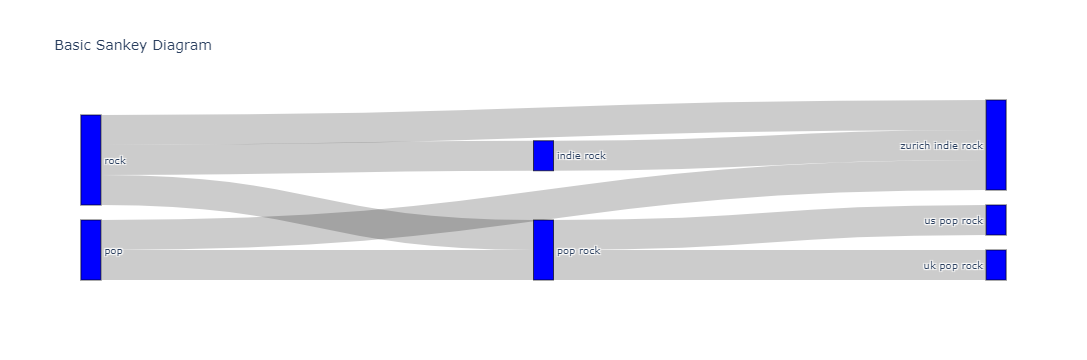

In [182]:
import plotly.graph_objects as go

label = [
    'rock',
    'pop',
    'indie rock',
    'pop rock',
    'zurich indie rock',
    'us pop rock',
    'uk pop rock',
]

source = [0, 0, 1, 2, 3, 3, 1, 0]
target = [2, 3, 3, 4, 5, 6, 4, 4]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = [1, 1, 1, 1, 1, 1, 1, 1],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

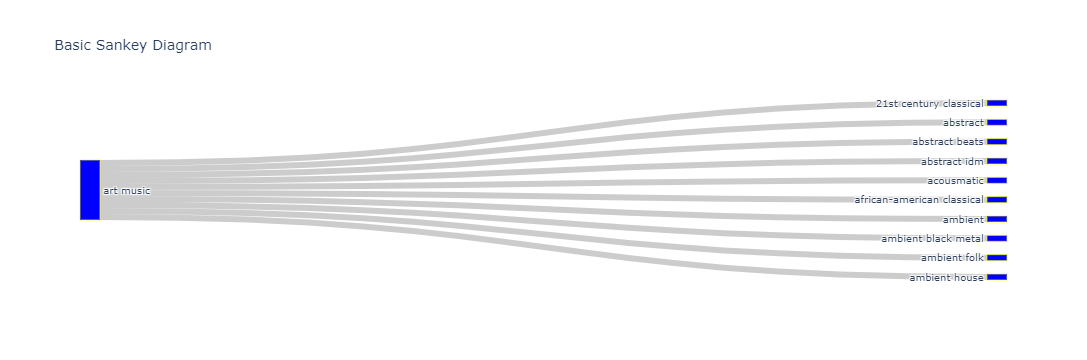

In [194]:
genres_dict = dict()
source = list()
target = list()
label = list()

top_genres = genres_df['top_genre'].unique()
for parent_genre in top_genres[:1]:
    parent_genre_df = genres_df.loc[genres_df['top_genre'] == parent_genre]
    sub_genres = parent_genre_df['spotify_genre'].unique()[:10]
    genres_dict[parent_genre] = list(sub_genres)
    for sub_genre in sub_genres:
        genres_dict[sub_genre] = list()

label = list(genres_dict.keys())
value = [1 for x in range(len(label))]

for parent_genre, sub_genres in genres_dict.items():
    parent_index = label.index(parent_genre)
    for sub_genre in sub_genres:
        sub_index = label.index(sub_genre)
        source.append(parent_index)
        target.append(sub_index)
        
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "yellow", width = 0.5),
      label = label,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

---
---

In [80]:
artists_multiple_matches_df = artists_df.loc[idx_list].sort_values(by=['spotify_name'])
#artists_multiple_matches_df.to_csv('data/spotify/data_spotify_artists_multiple_matches.csv', encoding='utf-8')
artists_multiple_matches_df

,artist_name,spotify_name,spotify_id,spotify_popularity,spotify_followers,spotify_listeners
artist_id,,,,,,
/artists/10119580-22deg-halo,22° Halo,22º Halo,6p355yiyJc67iSNeWLM8WH,11.0,1067.0,1500.0
/artists/9804639-22-halo,22 Halo,22º Halo,6p355yiyJc67iSNeWLM8WH,11.0,1067.0,1500.0
/artists/7309389-a-crashed-blackbird-rosehip,A Crashed Blackbird Rosehip,A Crashed Blackbird Called Rosehip,1NKizqgwDCXtUbMHeqA2Tv,6.0,88.0,635.0
/artists/6506249-a-crashed-blackbird-called-rosehip,A Crashed Blackbird Called Rosehip,A Crashed Blackbird Called Rosehip,1NKizqgwDCXtUbMHeqA2Tv,6.0,88.0,635.0
/artists/5990259-aspell,A-Spell,A.Spell,4zkmCFtAa1ETWHoZ2sNGvO,0.0,25.0,9.0
...,...,...,...,...,...,...
/artists/531180-za,Za!,Zaz,1mbgj8ERPs8lWi7t5cYrdy,65.0,1195585.0,2100000.0
/artists/25827-zippo,Zippo,Zippo,7Int2nVSzSBL8UDty3jGAR,23.0,1363.0,1300.0
/artists/7284179-zippo-italy,Zippo,Zippo,7Int2nVSzSBL8UDty3jGAR,23.0,1363.0,1300.0
